In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def all_pairs(nodes):
    #import pdb; pdb.set_trace()
    #print(nodes)
    for i, u in enumerate(nodes):
        #print(i,u)
        for j, v in enumerate(nodes):
            if i>j:
                #print(u,v)
                yield u, v
    #print(nodes)
    #print(u,v)
    #pdb.set_trace()

In [3]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

In [4]:
nodes = range(3)
for edge in adjacent_edges(nodes, 1):
    print(edge)

(0, 1)
(1, 2)
(2, 0)


In [5]:
def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

In [6]:
lattice = make_ring_lattice(10, 4)

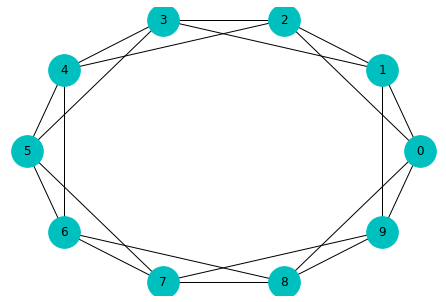

In [7]:
nx.draw_circular(lattice,
                node_color='c',
                node_size=1000,
                with_labels=True)

In [8]:
def make_ws_graph(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws

In [9]:
def rewire(G, p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)

In [10]:
def flip(p):
    return np.random.random() < p

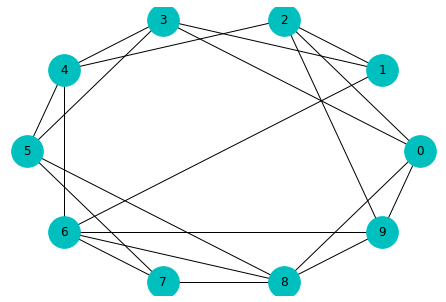

In [11]:
ws = make_ws_graph(10, 4, 0.2)
nx.draw_circular(ws,
                node_color='c',
                node_size=1000,
                with_labels=True)

In [12]:
len(lattice.edges()), len(ws.edges())

(20, 20)

(-1.0999999812245373,
 1.0999999991059322,
 -1.0461620954516297,
 1.0461622083036155)

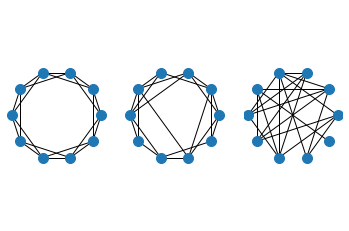

In [13]:
n = 10
k = 4
ns = 100

plt.subplot(1,3,1)
ws = make_ws_graph(n, k, 0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,3,2)
ws = make_ws_graph(n, k, 0.2)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,3,3)
ws = make_ws_graph(n, k, 1.0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

In [14]:
def node_clustering(G, u):
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan
    possible = k * (k-1) / 2
    exist = 0
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist +=1
    return exist / possible

In [15]:
lattice = make_ring_lattice(10, 4)
node_clustering(lattice, 1)

0.5

In [16]:
def clustering_coefficient(G):
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

In [17]:
clustering_coefficient(lattice)

0.5

In [18]:
def path_lengths(G):
    length_map = nx.shortest_path_length(G)
    #print(length_map)
    for source, dist_map in length_map:
        for dest, dist in dist_map.items():
            yield dist

In [19]:
def characteristic_path_length(G):
    return np.mean(list(path_lengths(G)))

In [20]:
lattice = make_ring_lattice(1000, 10)

In [21]:
characteristic_path_length(lattice)

50.4

In [22]:
def run_one_graph(n, k, p):
    ws = make_ws_graph(n, k, p)
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    print(mpl, cc)
    return mpl, cc

In [23]:
time run_one_graph(1000, 10, 0.01)

9.014084 0.6492887445887446
Wall time: 1.49 s


(9.014084, 0.6492887445887446)

In [24]:
ps = np.logspace(-4, 0, 9)
print(ps)

[1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]


In [25]:
def run_experiment(ps, n=1000, k=10, iters=20):
    res = []
    for p in ps:
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        res.append(means)
    return np.array(res)

In [26]:
L, C = np.transpose(run_experiment(ps))

38.60293 0.6662787878787878
50.4 0.6666666666666665
50.4 0.6666666666666665
50.4 0.6666666666666665
28.938278 0.6655752525252524
50.4 0.6666666666666665
38.957466 0.665890909090909
50.4 0.6666666666666665
50.4 0.6666666666666665
50.4 0.6666666666666665
50.016046 0.6662787878787878
50.4 0.6666666666666665
38.44549 0.6662065656565656
50.4 0.6666666666666665
50.4 0.6666666666666665
50.4 0.6666666666666665
39.50171 0.6664232323232322
36.80839 0.6656742424242422
35.316996 0.6655752525252524
35.883136 0.6659631313131312
42.312044 0.6661343434343432
47.366596 0.66635101010101
26.824328 0.6656474747474747
33.388828 0.6659631313131312
23.69032 0.6650469696969695
35.495492 0.6655752525252524
42.64231 0.6664232323232322
35.117748 0.6655752525252525
42.360234 0.6664232323232322
46.688336 0.6658717171717171
50.4 0.6666666666666665
40.873174 0.6657505050505049
35.129828 0.6650469696969696
39.413358 0.6662787878787878
32.46955 0.6655030303030302
26.271624 0.6647272727272726
40.093564 0.66581868686868

In [27]:
L

array([44.8435221, 38.9924418, 28.7065786, 14.7371522,  8.9177533,
        5.9432656,  4.4383498,  3.5745684,  3.2640305])

In [28]:
C

array([0.66635997, 0.66592801, 0.66478962, 0.65993149, 0.64704812,
       0.6077116 , 0.4920109 , 0.21976105, 0.00904982])

In [29]:
L /= L[0]
C /= C[0]

NameError: name 'decorate' is not defined

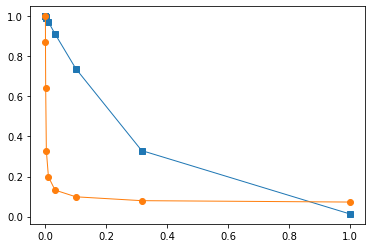

In [30]:
plt.plot(ps, C, 's-', linewidth=1, label='C(p) / C(0)')
plt.plot(ps, L, 'o-', linewidth=1, label='L(p) / L(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
        title='Normalized clustering coefficient and path length',
        xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])

In [ ]:
lattice = make_ring_lattice(10, 4)

In [ ]:
nx.draw_circular(lattice,
                node_color='c',
                node_size=1000,
                with_labels=True)

In [ ]:
from collections import deque

In [ ]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [ ]:
reachable_nodes_bfs(lattice, 0)

In [ ]:
def reachable_nodes_bfs(G, start):
    seen = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            queue.extend(G.neighbors(node))
    return seen

In [ ]:
reachable_nodes_bfs(lattice, 0)

In [ ]:
def shortest_path_dijkstra(G, source):
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1
        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        queue.extend(neighbors)
    return dist

In [ ]:
lattice = make_ring_lattice(10, 4)

In [ ]:
nx.draw_circular(lattice,
                node_color='r',
                node_size=1000,
                with_labels=True)

In [ ]:
d1 = shortest_path_dijkstra(lattice, 0)
d1

In [ ]:
d2 = nx.shortest_path_length(lattice, 0)
d2

In [ ]:
d1==d2

In [ ]:
#Exercises

In [ ]:
# Here is 'adjacent_edges' again for comparison:

def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

In [ ]:
# And here's a function that computes edges that connect each
# node to the one half-way around the circle

def opposite_edges(nodes):
    """Enumerates edges that connect opposite nodes."""
    n = len(nodes)
    for i, u in enumerate(nodes):
        j = i + n//2
        v = nodes[j % n]
        yield u, v

In [ ]:
# Now we can make regular graphs.

def make_regular_graph(n, k):
    """Makes graph with 'n' nodes where all nodes have 'k' neighbors.
    Not possible if both 'n' and 'k' are odd."""
    # a is the number of adjacent edges
    # b is the number of opposite edges (0 or 1)
    a, b = divmod(k, 2)
    
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, a))
    
    # if k is odd, opposite edges
    if b:
        if n%2:
            msg = "Can't make a regular graph if n and k are odd."
            raise ValueError(msf)
        G.add_edges_from(opposite_edges(nodes))
    return G

In [ ]:
# Here's an example.

regular = make_regular_graph(10, 3)

nx.draw_circular(regular,
                node_color='b',
                node_size=1000,
                with_labels=True)

In [ ]:
# Exercise 3.2

In [ ]:
def plain_bfs(G, start):
    """A fast BFS node generator"""
    seen = set()
    nextlevel = {start}
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            if v not in seen:
                seen.add(v)
                nextlevel.update(G[v])
    return seen

In [ ]:
# The version from NetwoekX is faster.
# Here's a version of Dijkstra's aalgorithm that works the same way:
def plain_shortest_path(G, source):
    """A fast version of Dijkstra's algorithm for equal edges."""
    new_dist = 0
    dist = {}
    nextlevel = {source}
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            if v not in dist:
                dist[v] = new_dist
                nextlevel.update(G[v])
        new_dist += 1
    return dist

In [ ]:
# It is substantually faster than the version that uses a deque.
# lattice = make_ring_lattice(1000, 10)
# shortest_path_dijkstra(lattice, 0) --> 2,1 ms
# plain_shortest_path(lattice, 0) --> 1,51 ms
# nx.shortest_path_length(lattice, 0) --> 3,7 ms

In [ ]:
# Exercise 3.3
# The following implementation of BFS contains two performance errors.
# What are they? What is the actual order of growth for this algorithm?

In [ ]:
def bfs(G, start):
    """Breadth-first search on a graph, starting at top_node."""
    visited = set()
    qued = [start]
    while len(queue):
        curr_node = queue.pop(0)   #Dequeue
        visited.add(curr_node)
        
        # Enqueue non-visited and non-enqueued children
        queue.extend(c for c in G[curr_node]
                    if c not in visited and c not in queue)
    return visited

In [ ]:
# Solution
"""The first performance error is using 'pop(0)' on a list,
which is linear in the length of the list. The second error is checking
whether the childern are in queue, which is also linear in the lengrh of the list.
In the worst case, a completely connected graph, the queue loop runs 'n' times,
and each time we have to check 'n' nodes to see if they are in a list with 'n' elements,
so the total run time is 'O(n^3)', which is really terrible.

By the way, I did not make this example up. It used to be on [the Wikipedia page for BFS]
(https://en.wikipedia.org/wiki/Breadth-first_search).
In fact, if you search the Internet for Python implementations of BFS, many of them
contain at least one performance error.
"""
None

In [ ]:
# Exercise 3.4
# In Section 3.10, I claimed that Dijkstra's algoritm does not woek unless it uses BFS.
# Write a version of shortest_path_dijkstra that uses DFS and test it on a few examples
# to see what goes wrong.

In [33]:
# Solution

# Here's the broken version:
from collections import deque

def shortest_path_dfs(G, start):
    dist = {start: 0}
    queue = deque([start])
    while queue:
        node = queue.pop()
        new_dist = dist[node] + 1
        
        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

# Sure enough, it gets the answers wrong

lattice = make_ring_lattice(10, 4)
d1 = shortest_path_dfs(lattice, 0)
print(d1)
d2 = nx.shortest_path_length(lattice, 0)
print(d2)
d1 == d2

{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 7: 2, 5: 3, 6: 3, 4: 4, 3: 5}
{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 3: 2, 4: 2, 6: 2, 7: 2, 5: 3}


False